In [27]:
# Calculations derived from the Appendix section
# of https://flybubble.com/performance-flying-book
# by Dennis Pagen (c) 1994
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [14]:
# Turn performance (p333)
import sympy, math
m, r, phi, Vs, g = sympy.symbols("m r phi V_s g")

In [15]:
Vc = Vs/sympy.sqrt(sympy.cos(phi))

In [16]:
F = m*g*sympy.tan(phi)
t = 2*sympy.pi*r/Vc
C = m*Vc**2/r

In [18]:
Vc1 = sympy.solve(C-F, Vc)[1]
Vc1

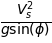

In [22]:
minr = sympy.solve(Vc - Vc1, r)[0]   # Equation (6)
minr

In [26]:
# Flight of glider at 11m/s, set g, bank angle 
# of 30degrees gives an observed circleD of 50m
minr.subs({Vs:11, g:9.8, phi:math.radians(30)})

In [33]:
# no matter how much you bank, it can never 
# be less than the half this amount
minr.subs({Vs:11, g:9.8, phi:math.radians(89)})

In [41]:
# Wing Loading (p334)
# Cf coefficient relating to the shape of the body
# rho air density, S wing surface area, V airspeed
Cf, rho, S, V = sympy.symbols("C_f rho S V")
F = Cf * rho * S * V**2
F

In [51]:
# The speed polar is approximated by a parabola
# suggested by:
# W = -0.608*V**2 + 26.198*V - 461.960
# W sink rate in ft/minute, V in miles per hour
mph_to_mps = 5280*12*2.54/3600/100
ftpmin_to_mps = 12*2.54/60/100

# in feet
V = 11/mph_to_mps
W = -0.608*V**2 + 26.198*V - 461.960
print(W*ftpmin_to_mps, "m/s")

-0.9420855401574799 m/s


In [60]:
# In metric
V = 11
W = -0.0155*V**2 + 0.298*V - 2.35
print(W)  # This sink rate is similar to observed

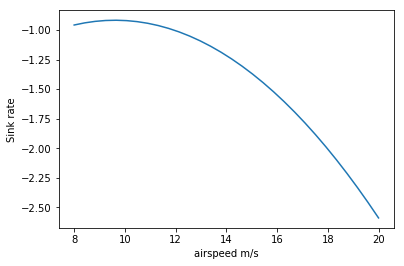

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

V = numpy.linspace(8, 20, 30)
W = -0.0155*V**2 + 0.298*V - 2.35

plt.plot(V, W)
plt.ylabel("Sink rate")
plt.xlabel("airspeed m/s")

In [66]:
# Calculate flying speed from polar (p336)
a, b, c, V = sympy.symbols("a b c V")
W = a*V**2 + b*V + c
#{a:-0.0155, b:0.298, c:-2.35}
W


In [76]:
Ws = sympy.symbols("Ws")
Glideslope = V/(Ws+W)
sympy.solve(sympy.diff(Glideslope, V))


In [ ]:
# Skipping the average speed to fly calculations

In [78]:
# Performance formulas 
# "Using the formulas for induced and parasitic drag, 
# it is possible to derive a more accurate equation
# for a glider's polar.  Such a derivation is beyond 
# the scope of this book"
# But we can report state the value at cardinal points

theta, CDO, w, rhov, K, AR = sympy.symbols("theta C_DO omega rho_v Kappa AR")
# AR - aspect ratio
# theta - glide angle
# CDO - Drag coefficient at zero lift
# w - wing loading = weight/wing_area
# rhov - air density at sea level
# K - span efficiency factor

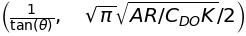

In [91]:
# best glide
1/sympy.tan(theta), sympy.sqrt(sympy.pi*AR/(4*K*CDO))

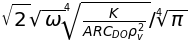

In [89]:
# speed at best glide
(4*K/(sympy.pi*AR*CDO*rhov**2))**sympy.Rational(1,4) * sympy.sqrt(w)

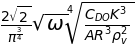

In [88]:
# sink at best glide
(4**3*K**3*CDO/(sympy.pi**3*AR**3*rhov**2))**sympy.Rational(1,4) * sympy.sqrt(w)

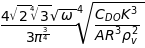

In [86]:
# Minimum sink
4*(4*K**3*CDO/(27*sympy.pi**3*AR**3*rhov**2))**sympy.Rational(1,4) * sympy.sqrt(w)

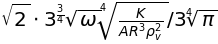

In [87]:
# Speed at minimum sink
(4*K/(3*sympy.pi*AR**3*rhov**2))**sympy.Rational(1,4) * sympy.sqrt(w)

In [104]:
# Worked example is AR = 7.5, 
# wing loading = 1.6 lbs/sq.ft
# best glide is 11.5 at 27mph (39.6 FPS)
# rhov = 0.00238 slugs

eq1 = 11.5 - sympy.sqrt(sympy.pi*AR/(4*K*CDO))
eq2 = 39.6 - (4*K/(sympy.pi*AR*CDO*rhov**2))**sympy.Rational(1,4) * sympy.sqrt(w)

# substitute thevalues
eq1 = eq1.subs({AR:7.5, w:1.6, rhov:0.00238})
eq2 = eq2.subs({AR:7.5, w:1.6, rhov:0.00238})
Ksolve = sympy.solve(eq1, K)[0]

# gives the two numbers in the book
CDOsolve = sympy.solve(eq2.subs(K, Ksolve), CDO)[1]
print("K=", Ksolve.subs(CDO, CDOsolve))
print("CDO=", CDOsolve)


K= 1.19481495722029
CDO= 0.0372781896458562


In [105]:
# "The drag coefficient matches wind tunnel experiments"
# The reciprocal of K is the efficiency
1/1.195

In [ ]:
# We pay a 16% loss of performance for our sweep 
# and twist.  If our aspect radio is 7.5, our effective
# aspect radio is 84% if this or 6.3